In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
# import dependencies
import logging
import numpy as np

import htfa_torch.tfa as TFA
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [4]:
tfa = TFA.TopographicalFactorAnalysis('data/pieman_data/sub-001-task-intact1.nii', num_factors=25)

In [5]:
prior_sample = tfa.sample()

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    prior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

prior_sample

del prior_sample

04/17/2018 14:52:53 Prior Reconstruction Error (Frobenius Norm): 5.36581787e+03


In [6]:
losses = tfa.train(num_steps=200, log_level=logging.INFO, batch_size=tfa.voxel_activations.shape[0], num_particles=4, use_cuda=True)

04/17/2018 14:52:53 [Epoch 1] (236ms) Posterior free-energy 6.84185344e+09
04/17/2018 14:52:53 [Epoch 2] (222ms) Posterior free-energy 8.55281664e+09
04/17/2018 14:52:53 [Epoch 3] (221ms) Posterior free-energy 6.76501658e+09
04/17/2018 14:52:54 [Epoch 4] (223ms) Posterior free-energy 5.27713229e+09
04/17/2018 14:52:54 [Epoch 5] (221ms) Posterior free-energy 5.29850010e+09
04/17/2018 14:52:54 [Epoch 6] (260ms) Posterior free-energy 3.90854989e+09
04/17/2018 14:52:54 [Epoch 7] (225ms) Posterior free-energy 3.17389542e+09
04/17/2018 14:52:55 [Epoch 8] (253ms) Posterior free-energy 3.08506342e+09
04/17/2018 14:52:55 [Epoch 9] (226ms) Posterior free-energy 2.52127872e+09
04/17/2018 14:52:55 [Epoch 10] (251ms) Posterior free-energy 2.28579482e+09
04/17/2018 14:52:55 [Epoch 11] (256ms) Posterior free-energy 2.19651584e+09
04/17/2018 14:52:56 [Epoch 12] (225ms) Posterior free-energy 2.07460928e+09
04/17/2018 14:52:56 [Epoch 13] (229ms) Posterior free-energy 2.11638707e+09
04/17/2018 14:52:56 [

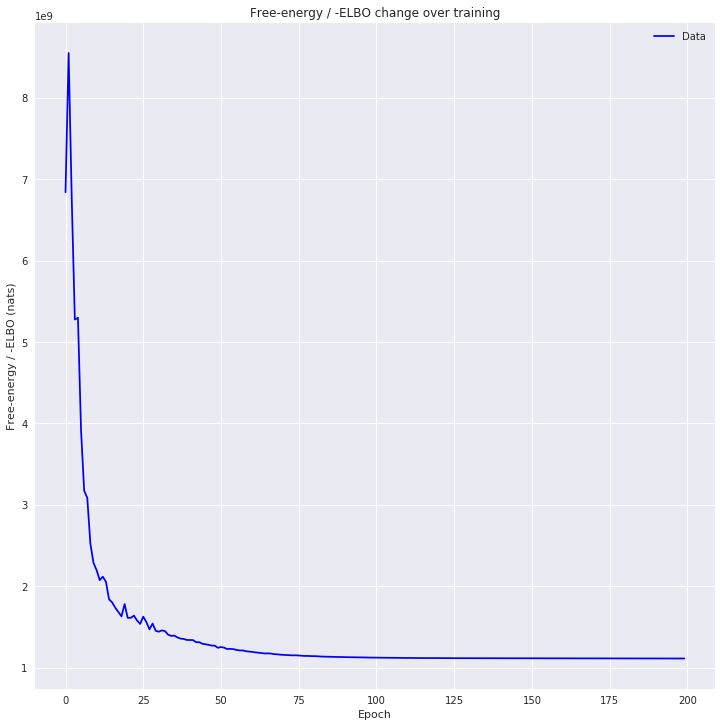

04/17/2018 14:53:43 Reconstruction Error (Frobenius Norm): 4.79301611e+03
04/17/2018 14:53:43 {'weights': array([[-0.2375277 ,  1.7311885 ,  0.8151393 , ...,  0.52115214,
        -1.8186626 ,  0.4103093 ],
       [-1.0321538 ,  0.74581385,  1.8937298 , ...,  0.2785001 ,
         0.01468953,  0.9655226 ],
       [-2.168096  ,  0.24607992,  2.12768   , ..., -1.1969393 ,
         0.86937445,  1.8199018 ],
       ...,
       [-4.3333874 ,  0.20973262,  1.5752108 , ..., -0.28408444,
         0.24890704,  0.16051412],
       [-4.647032  ,  0.02572536,  2.9443789 , ..., -0.02726548,
        -0.20122261, -0.8514571 ],
       [-5.211112  ,  0.28514838,  3.8459332 , ...,  1.992747  ,
         0.4442218 , -1.9700533 ]], dtype=float32), 'factors': array([[0.01514012, 0.01584585, 0.01650853, ..., 0.01347588, 0.01463152,
        0.01522228],
       [0.00103893, 0.00102354, 0.00100112, ..., 0.6417613 , 0.6698467 ,
        0.62720025],
       [0.00252264, 0.00253393, 0.00253335, ..., 0.08210698, 0.085

In [7]:
utils.plot_losses(losses)

results = tfa.results()
logging.info(results)

In [8]:
posterior_sample = tfa.sample(posterior_predictive=True)

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    posterior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

posterior_sample

04/17/2018 14:53:44 Prior Reconstruction Error (Frobenius Norm): 4.82716455e+03


Trace{'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537])}

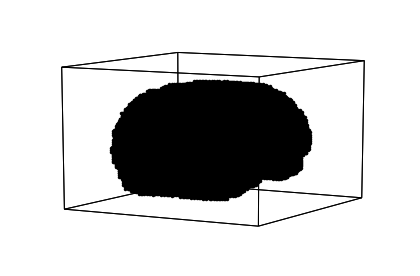

04/17/2018 14:53:44 Reconstruction Error (Frobenius Norm): 4.79288428e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


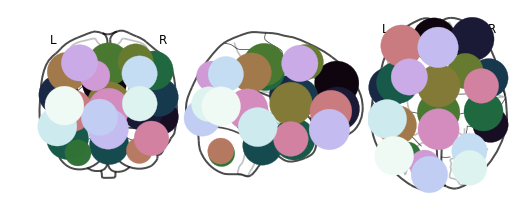

In [9]:
tfa.plot_voxels()
tfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


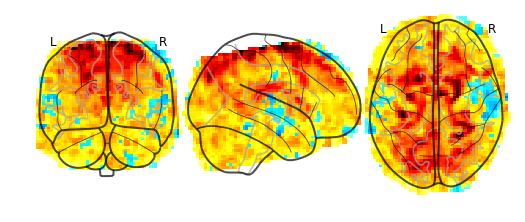

04/17/2018 14:53:46 Reconstruction Error (Frobenius Norm): 4.79268018e+03


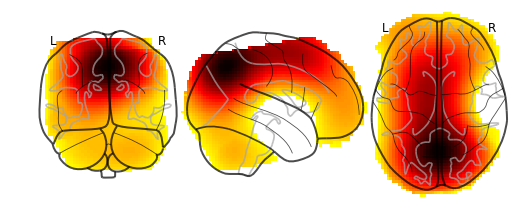

In [10]:
tfa.plot_original_brain()
tfa.plot_reconstruction()

04/17/2018 14:53:59 Reconstruction Error (Frobenius Norm): 4.79271484e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


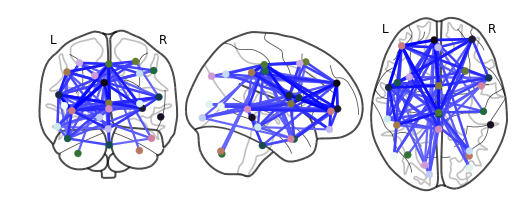

In [11]:
tfa.plot_connectome()